# ESTRUCTURAS I - CURSO 2023-2024
***Universidad de Granada***

---





**PRÁCTICA 1:**

Determinar los diagramas de esfuerzos de la siguiente estructura.

<img src="https://github.com/EnriqueGarMac/Estructuras_I/blob/main/Ejemplos/Imagenes/Practica_I.jpg?raw=true" width="600">



In [11]:
# Instalar paquete anastruct
!pip install git+https://github.com/EnriqueGarMac/Estructuras_I_II.git

  Cloning https://github.com/EnriqueGarMac/Estructuras_I_II.git to /tmp/pip-req-build-3izcel4t
  Running command git clone --filter=blob:none --quiet https://github.com/EnriqueGarMac/Estructuras_I_II.git /tmp/pip-req-build-3izcel4t
  Resolved https://github.com/EnriqueGarMac/Estructuras_I_II.git to commit b956e909912a273d0413035c94e551791a45a353
  Preparing metadata (setup.py) ... done


In [28]:
# Cargamos el software anastruct
from anastruct import SystemElements
import collections
collections.Iterable = collections.abc.Iterable

# Cargamos el objeto de nuestra estructura
ss = SystemElements()

In [29]:
# Construcción de la estructura
# Añadimos elemento barra 1
ss.add_element(location=[[0, 0], [2.,0]]);
# Añadimos elemento barra 2
ss.add_element(location=[[2., 0], [3.,0]], spring={2: 0});
# Añadimos elemento barra 2
ss.add_element(location=[[3., 0], [4.,0]]);
# Añadimos elemento barra 2
ss.add_element(location=[[4., 0], [6.,0]]);

In [30]:
# Condiciones de contorno

# Añadimos apoyo fijo al nodo 1
ss.add_support_hinged(node_id=1)
# Añadimos carrito al nodo 4
ss.add_support_roll(node_id=4, direction=2)
# Añadimos carrito al nodo 5
ss.add_support_roll(node_id=5, direction=2)

In [31]:
# Cargas

# Añadimos carga puntual al nodo 1
ss.point_load(2, Fx=0, Fy=-5)

# Añadimos momento puntual al nodo 1
ss.moment_load(1, Ty=2)

# Añadimos carga triangular
ss.q_load(element_id=4, q=(0,12), q_perp=(0,0))

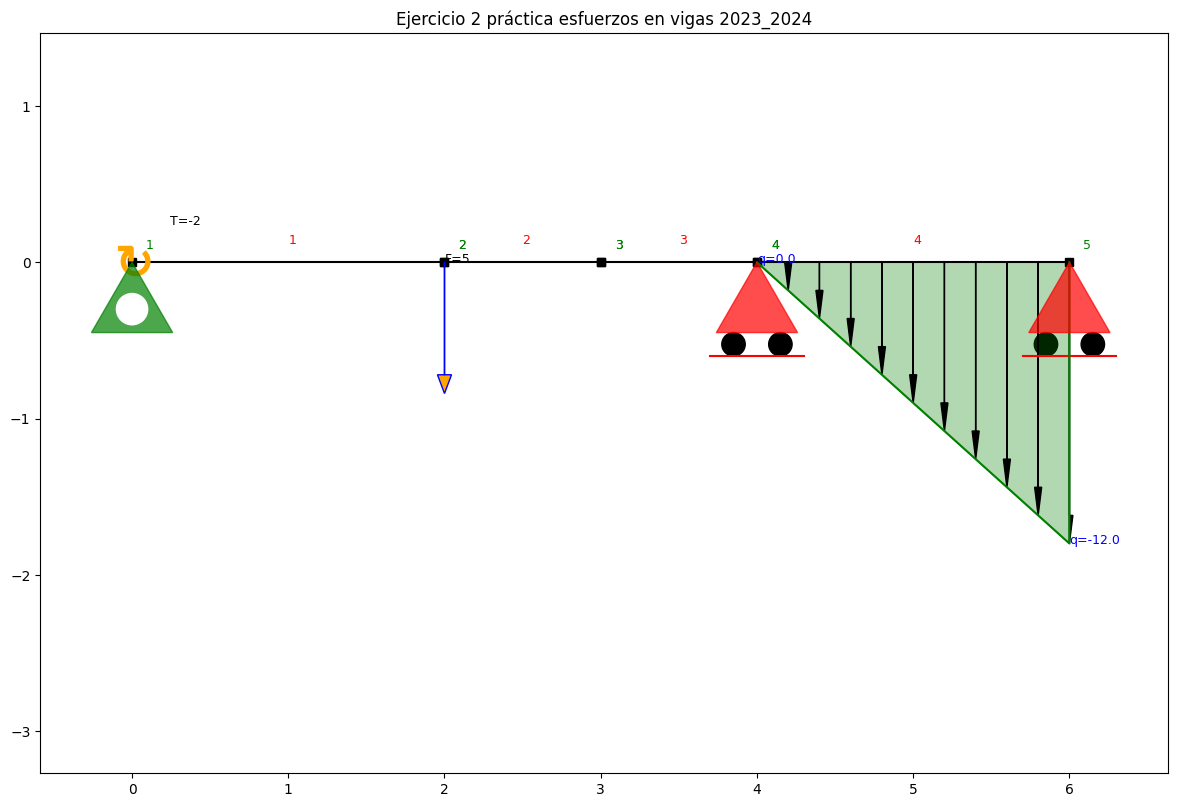

In [32]:
# Mostramos estructura generada
ss.show_structure(title='Ejercicio 2 práctica esfuerzos en vigas 2023_2024')


In [33]:
# Resolvemos la estructura
ss.solve();

 
 
Nudo -> Despl. x  Despl. y
**************************************************
1  ->  -0.0   0.0
2  ->  -9.797174393178831e-20   -0.0008177778844444179
3  ->  -1.4695761589768246e-19   -0.00036000015999996014
4  ->  -1.959434878635766e-19   0.0
5  ->  -2.6125798381810213e-19   0.0


Reacciones
***************************
*Nodo:  1
Reacción Fy:  1.0
*Nodo:  4
Reacción Fy:  10.0
*Nodo:  5
Reacción Fy:  6.0


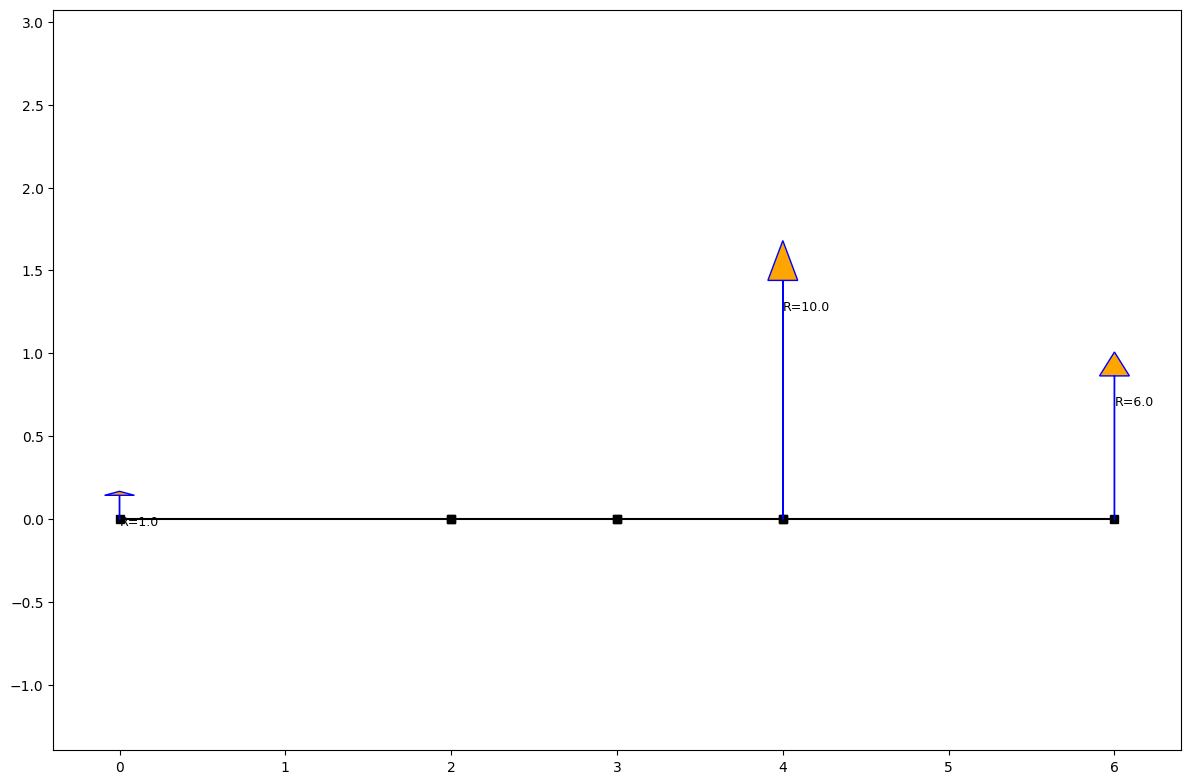

-------------------------------------------


In [34]:
# Mostramos las reacciones
ss.show_reaction_force()

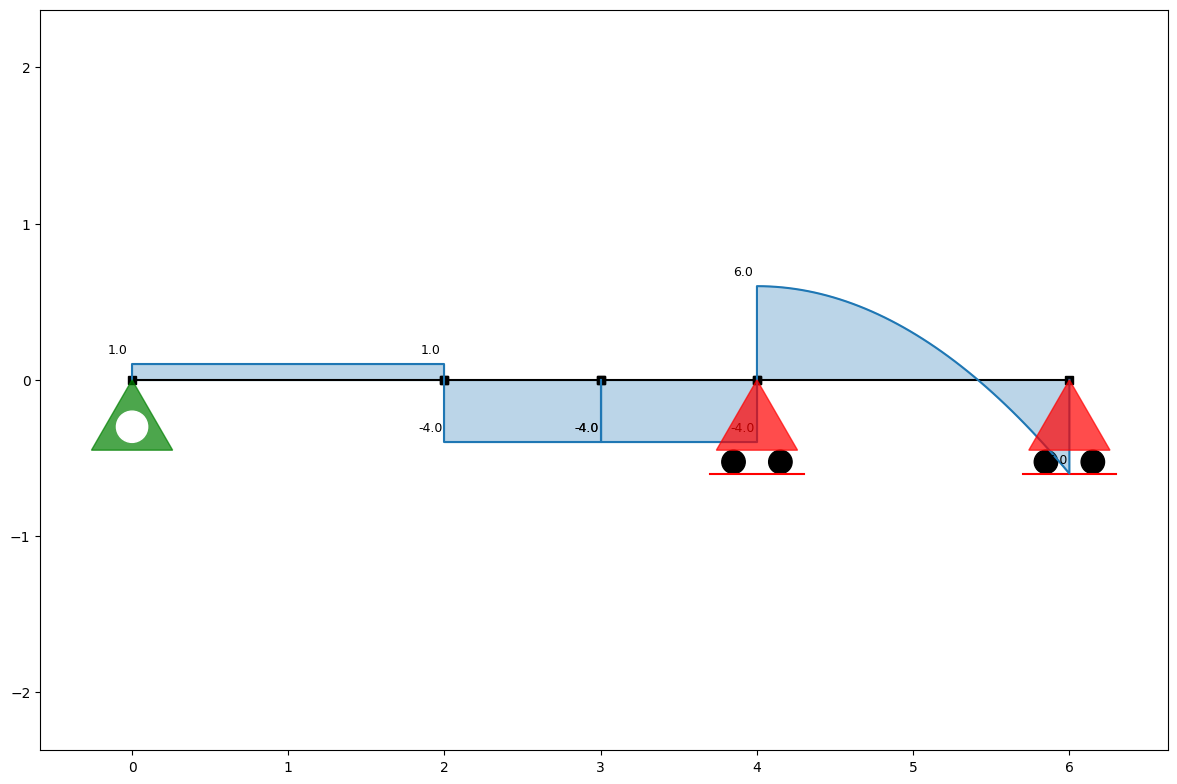

In [35]:
# Mostramos cortantes
ss.show_shear_force()

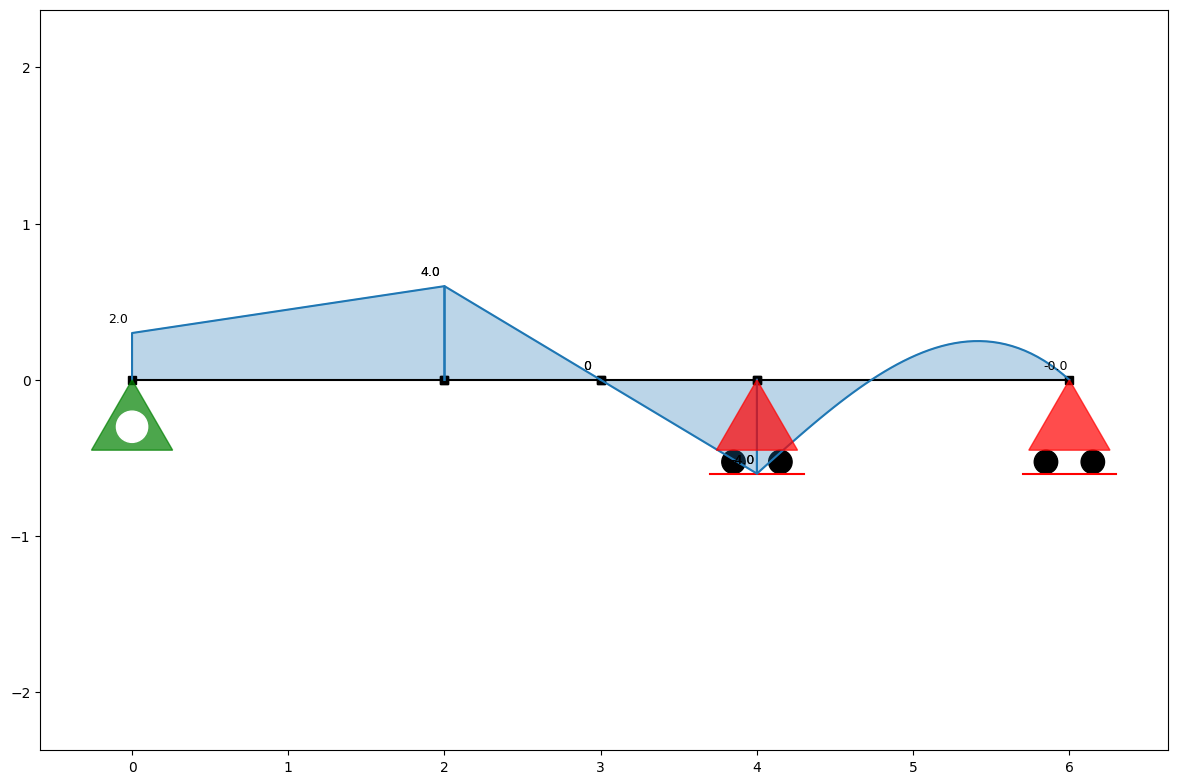

In [36]:
# Mostramos flectores
ss.show_bending_moment()

Maximum deflection: 0.0009; Position: (x,y) = (1.673,0.0)
Maximum deflection: 0.0008; Position: (x,y) = (2.0,0.0)
Maximum deflection: 0.0004; Position: (x,y) = (3.0,0.0)
Maximum deflection: 0.0001; Position: (x,y) = (5.347,0.0)


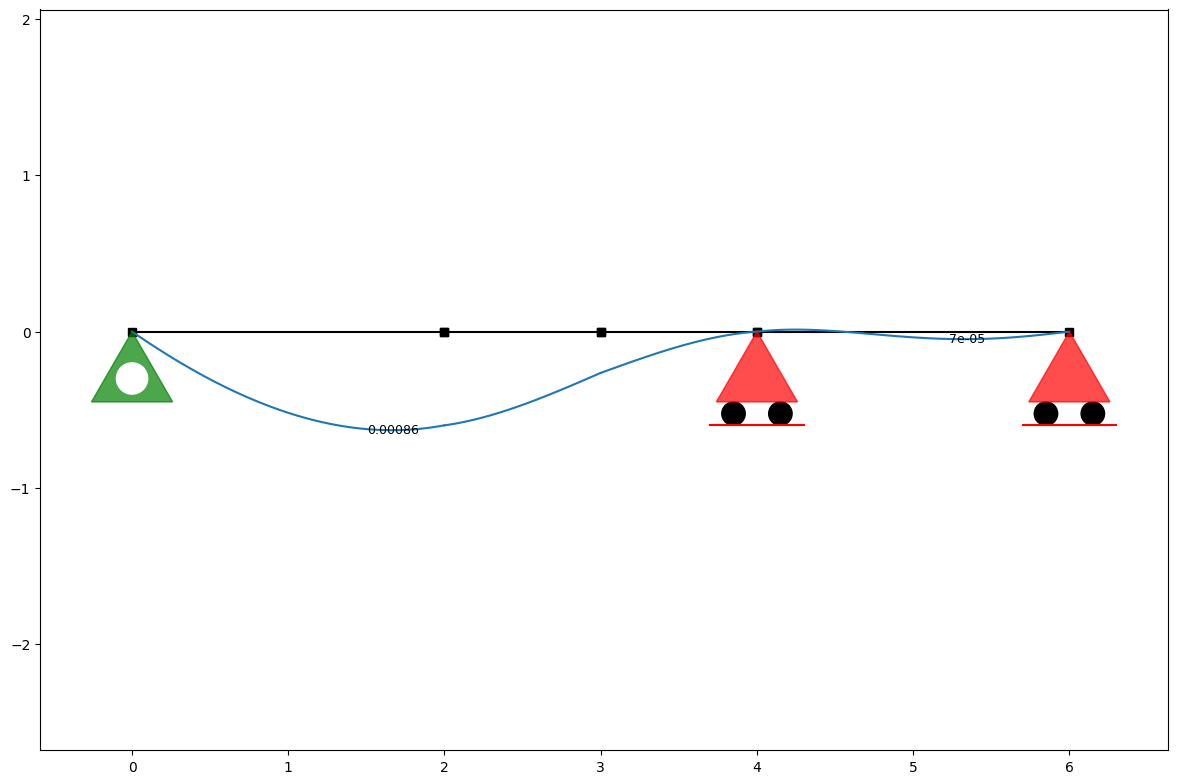

In [37]:
# Mostramos deformada
ss.show_displacement()